In [1]:
pwd

u'/Users/vasilis/Documents/courses_conferences_ppts/Ice_Core_Claciology/ICG_2016/ICG_2016_ipynb'

(0.20000000000000001, 1.0)


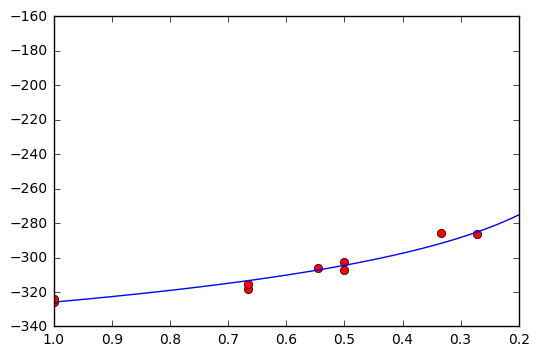

In [17]:
import numpy as np
from matplotlib import pyplot as plt
plt.ion()
data = np.genfromtxt("./FractionationExp_results.txt", skip_header = 1)
m_glass = data[:,1].astype(float)
m_tot = data[:,2]
m_evap = data[:,3]
d18 = data[:,4]
dD = data[:,5]
f = (m_evap - m_glass)/(m_tot-m_glass)
plt.figure(1)
plt.plot(f, dD, "ro")
print(plt.xlim())
plt.xlim(plt.xlim()[::-1])

def raylegh_model(f, delta_o, alpha):
    delta_o = delta_o/1000.
    delta_r = (((delta_o + 1)*f**(alpha-1)) - 1)*1000
    return delta_r

f_fine = np.arange(0.01, 1, 0.01)
delta_r = raylegh_model(f = f_fine, delta_o = dD[0], alpha = 0.955)
plt.plot(f_fine, delta_r, "b")
plt.show()